In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\MSI\Downloads\archive\kindle_reviews.csv")

In [3]:
df.shape

(982619, 10)

In [4]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [5]:
df.tail()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600
982618,982618,B00M13FNSS,"[2, 2]",5,This book was everything. I just hope Alexus w...,"07 23, 2014",A2NRGE3CSFY2TQ,Yo,Great read.hands down #5star hit,1406073600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982619 entries, 0 to 982618
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      982619 non-null  int64 
 1   asin            982619 non-null  object
 2   helpful         982619 non-null  object
 3   overall         982619 non-null  int64 
 4   reviewText      982597 non-null  object
 5   reviewTime      982619 non-null  object
 6   reviewerID      982619 non-null  object
 7   reviewerName    978803 non-null  object
 8   summary         982618 non-null  object
 9   unixReviewTime  982619 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 75.0+ MB


In [7]:
df.isnull().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [8]:
#Extra unnammed columns present in it
df.drop(df.columns[0], axis = 1, inplace = True)

In [9]:
#No reviews present in it so dropping the rows
df.dropna(subset = ['reviewText'], inplace = True)

In [10]:
#Performing column with year
df.reviewTime = pd.to_datetime(df.reviewTime)

#creating a column with just the year
df['Year'] = df.reviewTime.dt.year
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,2014
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,2014
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014


In [11]:
#Statistical Describe
df.describe()

,overall,unixReviewTime,Year
count,982597.000000,9.825970e+05,982597.000000
mean,4.347792,1.378183e+09,2013.225596
std,0.955061,2.298471e+07,0.808576
min,1.000000,9.522144e+08,2000.000000
25%,4.000000,1.365206e+09,2013.000000
50%,5.000000,1.383523e+09,2013.000000
75%,5.000000,1.396051e+09,2014.000000
max,5.000000,1.406074e+09,2014.000000


In [12]:
#Finding Number of unique Values from the data
columns = [df.columns]
for col in df:
    print("No of unique values in feature '{}' is : {}".format(col, df[col].nunique()))

No of unique values in feature 'asin' is : 61934
No of unique values in feature 'helpful' is : 1494
No of unique values in feature 'overall' is : 5
No of unique values in feature 'reviewText' is : 982267
No of unique values in feature 'reviewTime' is : 2117
No of unique values in feature 'reviewerID' is : 68223
No of unique values in feature 'reviewerName' is : 55477
No of unique values in feature 'summary' is : 623225
No of unique values in feature 'unixReviewTime' is : 2117
No of unique values in feature 'Year' is : 15


In [13]:
#overall counts of ratings.
df.overall.value_counts()

5    575246
4    254010
3     96193
2     34130
1     23018
Name: overall, dtype: int64

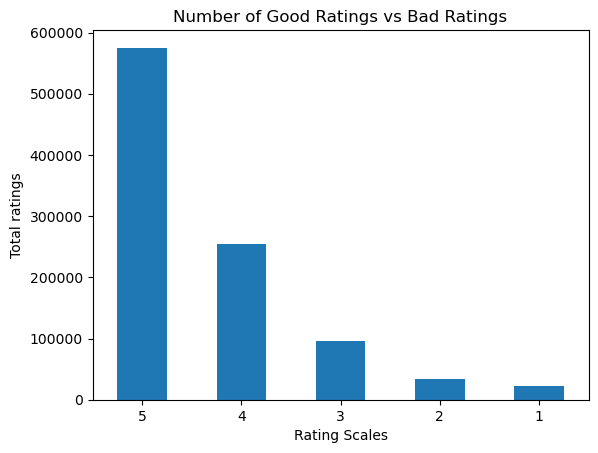

In [14]:
#plotting a graph between ratings
df.overall.value_counts().plot(kind = 'bar')
plt.title('Number of Good Ratings vs Bad Ratings')
plt.xlabel('Rating Scales')
plt.xticks(rotation = 0)
plt.ylabel('Total ratings')
plt.show()

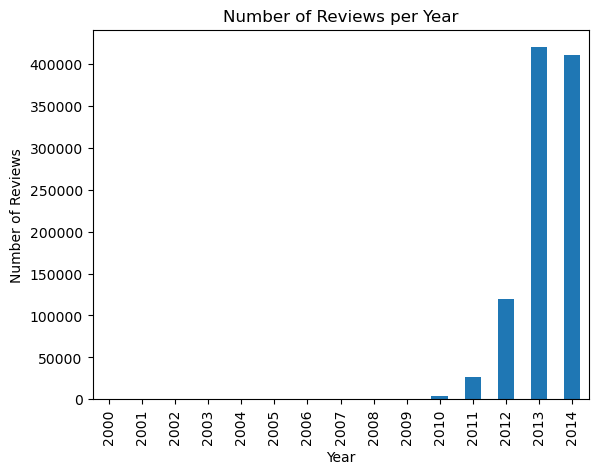

In [15]:
#plotting the bar graph betweeen no of reviews in year
df.Year.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

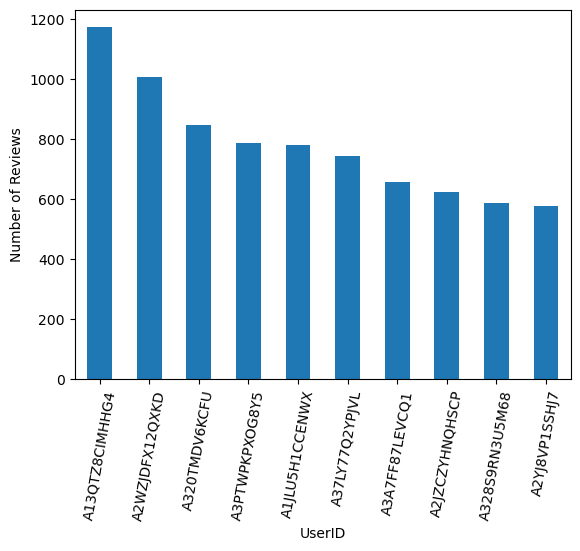

In [16]:
#plotting graph between top 10 users with more no of reviews
df.reviewerID.value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.xlabel('UserID')
plt.ylabel('Number of Reviews')
plt.show()

In [17]:
#overall counts of ratings.
df.overall.value_counts()

5    575246
4    254010
3     96193
2     34130
1     23018
Name: overall, dtype: int64

In [18]:
#changing the ratings into 0 and 1 for finding the positive and negative reviews
df.overall = np.where((df.overall <3), 0, df.overall)
df.overall = np.where((df.overall >3), 1, df.overall)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year
0,B000F83SZQ,"[0, 0]",1,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014
1,B000F83SZQ,"[2, 2]",1,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,2014
2,B000F83SZQ,"[2, 2]",1,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,2014
3,B000F83SZQ,"[1, 1]",1,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014
4,B000F83SZQ,"[0, 1]",1,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014


In [19]:
#adding a feature review to the dataframe
reviews = df[['reviewText', 'overall']]
reviews.head()

,reviewText,overall
0,I enjoy vintage books and movies so I enjoyed ...,1
1,This book is a reissue of an old one; the auth...,1
2,This was a fairly interesting read. It had ol...,1
3,I'd never read any of the Amy Brewster mysteri...,1
4,"If you like period pieces - clothing, lingo, y...",1


In [20]:
#Spliting the dataset into train and test
from sklearn.model_selection import train_test_split
train,test=train_test_split(df, test_size=0.3)

In [21]:
print(train.shape)
print(test.shape)

(687817, 10)
(294780, 10)


In [22]:
#DATA CLEANING
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
import re

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [23]:
#Text-Preprocessing
#printing the original text present in the review data
print('Original Text: ' + str(reviews['reviewText'][1]))
print('\n')

Original Text: This book is a reissue of an old one; the author was born in 1910. It's of the era of, say, Nero Wolfe. The introduction was quite interesting, explaining who the author was and why he's been forgotten; I'd never heard of him.The language is a little dated at times, like calling a gun a &#34;heater.&#34;  I also made good use of my Fire's dictionary to look up words like &#34;deshabille&#34; and &#34;Canarsie.&#34; Still, it was well worth a look-see.




In [24]:
reviews['reviewText'] = reviews['reviewText'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))
print('Alphabetical Words: '+ str(reviews['reviewText'][1]))
print('\n')

Alphabetical Words: This book is a reissue of an old the author was born in of the era Nero The introduction was quite explaining who the author was and why been never heard of language is a little dated at like calling a gun a I also made good use of my dictionary to look up words like and it was well worth a




C:\Users\MSI\AppData\Local\Temp\ipykernel_7164\2590391276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['reviewText'] = reviews['reviewText'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))


In [25]:
stop = stopwords.words('english')
#removing the stop words
reviews['reviewText'] = reviews['reviewText'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop))
print('Stopwords Remove: ' + str(reviews['reviewText'][1]))
print('\n')

Stopwords Remove: This book reissue old author born era Nero The introduction quite explaining author never heard language little dated like calling gun I also made good use dictionary look words like well worth




C:\Users\MSI\AppData\Local\Temp\ipykernel_7164\2715301776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['reviewText'] = reviews['reviewText'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop))


In [26]:
!pip3 install inflect

In [27]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [28]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
lem = WordNetLemmatizer()
reviews['reviewText'] = reviews['reviewText'].apply(lambda x : ' '.join(lem.lemmatize(word, pos = 'v') for word in x.split()))
print('Lemmatized Text: ' + str(reviews['reviewText'][1]))

Lemmatized Text: This book reissue old author bear era Nero The introduction quite explain author never hear language little date like call gun I also make good use dictionary look word like well worth


C:\Users\MSI\AppData\Local\Temp\ipykernel_7164\2104824194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['reviewText'] = reviews['reviewText'].apply(lambda x : ' '.join(lem.lemmatize(word, pos = 'v') for word in x.split()))


In [30]:
train.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year
130999,B0063M2E4O,"[0, 0]",1,I really do like the characters in this series...,2013-05-17,AELYPHV5KI2EV,"Sandra Cox ""Crafty Lady""",Another good read.,1368748800,2013
237872,B0087VGXVO,"[0, 0]",1,This book brings snow white & hunts man in a ...,2013-03-12,A10088912WTVKNKMB5N1E,Tyra Allen,Loved it,1363046400,2013
263769,B008M2I0WI,"[1, 1]",1,I'm pretty close to giving this a full five. T...,2013-02-28,A214SASPKRUU3X,commeca,A Very Dense and Intelligently Written Read,1362009600,2013
908307,B00JWET9SO,"[0, 0]",1,I genuinely and thoroughly enjoyed reading thi...,2014-04-25,AC4S7JUWTD3BY,C. R. Colombo,Thorough Enjoyed Reading!,1398384000,2014
89165,B005CKI3LQ,"[1, 3]",1,I always go to the one and 2 star reviews firs...,2011-09-26,A1LCFYWAALMEGB,"Nancy J. Oakes ""little bookworm""",almost didn`t buy due to poor reviews,1316995200,2011


In [31]:
test.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year
246516,B008C9J2H8,"[2, 2]",1,"As a person suffering from type 2 diabetes, I ...",2012-07-06,A1JX4RMZRBMSNF,bh poty,Diabetes Explained,1341532800,2012
444525,B00BLNNS0Y,"[2, 2]",1,"I liked the suspense, and I liked that i had s...",2013-05-29,A1PM3VAKW0OQNO,Sherril Stubblefield,We kept our promise.,1369785600,2013
11315,B00332F4YE,"[0, 0]",3,"The story is interesting: a middle class, educ...",2012-09-01,AXYHN7EAAVIVV,"Deeanna R. Franklin ""the bookster""","Excellent story, Not the best execution, but p...",1346457600,2012
621273,B00EN7RZ4A,"[0, 0]",1,This book was so good I couldn't put it down i...,2014-06-18,A1BQO66R6OLCCW,Nikey,Wow!!!,1403049600,2014
527602,B00CV2MGCK,"[0, 0]",1,"Ms Malone writes like a dream. Sweet story, w...",2013-10-24,A244D3UR9B44S1,Imelda,lovely weekend in hahndorf!,1382572800,2013


In [32]:
#Defining a Model

y_train = train['overall']
x_train = train
x_train.drop('overall', axis=1, inplace=True)

y_test = test['overall']
x_test = test
x_test.drop('overall', axis=1, inplace=True)

In [33]:
#tokenization
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train['reviewText'])

x_train['text_tok'] = tokenizer.texts_to_sequences(x_train['reviewText'].values)
x_test['text_tok'] = tokenizer.texts_to_sequences(x_test['reviewText'].values)

In [34]:
x_train.head()

,asin,helpful,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year,text_tok
130999,B0063M2E4O,"[0, 0]",I really do like the characters in this series...,2013-05-17,AELYPHV5KI2EV,"Sandra Cox ""Crafty Lady""",Another good read.,1368748800,2013,"[5, 49, 88, 45, 1, 51, 10, 8, 52, 1, 19, 282, ..."
237872,B0087VGXVO,"[0, 0]",This book brings snow white & hunts man in a ...,2013-03-12,A10088912WTVKNKMB5N1E,Tyra Allen,Loved it,1363046400,2013,"[8, 12, 728, 2018, 1099, 9886, 160, 10, 4, 81,..."
263769,B008M2I0WI,"[1, 1]",I'm pretty close to giving this a full five. T...,2013-02-28,A214SASPKRUU3X,commeca,A Very Dense and Intelligently Written Read,1362009600,2013,"[113, 308, 611, 3, 516, 8, 4, 265, 531, 1, 98,..."
908307,B00JWET9SO,"[0, 0]",I genuinely and thoroughly enjoyed reading thi...,2014-04-25,AC4S7JUWTD3BY,C. R. Colombo,Thorough Enjoyed Reading!,1398384000,2014,"[5, 3779, 2, 730, 103, 72, 8, 12, 100, 4291, 4..."
89165,B005CKI3LQ,"[1, 3]",I always go to the one and 2 star reviews firs...,2011-09-26,A1LCFYWAALMEGB,"Nancy J. Oakes ""little bookworm""",almost didn`t buy due to poor reviews,1316995200,2011,"[5, 176, 137, 3, 1, 30, 2, 231, 415, 503, 74, ..."


In [35]:
#padding and truncating
from tensorflow.keras.preprocessing import sequence
max_review_length = 1500
x_train_pad = sequence.pad_sequences(x_train['text_tok'].values, maxlen=max_review_length, padding='post')
x_test_pad = sequence.pad_sequences(x_test['text_tok'].values, maxlen=max_review_length, padding='post')

In [36]:
x_train_pad

array([[   5,   49,   88, ...,    0,    0,    0],
       [   8,   12,  728, ...,    0,    0,    0],
       [ 113,  308,  611, ...,    0,    0,    0],
       ...,
       [1224,   54, 2560, ...,    0,    0,    0],
       [  55,  438,   55, ...,    0,    0,    0],
       [1095, 1095, 1095, ...,    0,    0,    0]])

In [37]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [38]:
embedding_size=32

In [39]:
voc_size=982619

In [40]:
max_words=1500

In [41]:
model=Sequential()

In [42]:
model.add(Embedding(voc_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
#Printing the Model Summary.
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 32)          31443808  
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 31,504,001
Trainable params: 31,504,001
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
for layer in model.layers:                             #here we are looping through each layer
    for weight in layer.get_weights():                 #here we are looping through weight of each layer
        print(f'{layer}: {weight.shape}')              #printing the weights of each layers.

<keras.layers.core.embedding.Embedding object at 0x0000023681CC6CA0>: (982619, 32)
<keras.layers.rnn.lstm.LSTM object at 0x0000023681CC6850>: (32, 400)
<keras.layers.rnn.lstm.LSTM object at 0x0000023681CC6850>: (100, 400)
<keras.layers.rnn.lstm.LSTM object at 0x0000023681CC6850>: (400,)
<keras.layers.core.dense.Dense object at 0x0000023681CBFA60>: (100, 64)
<keras.layers.core.dense.Dense object at 0x0000023681CBFA60>: (64,)
<keras.layers.core.dense.Dense object at 0x00000236E8F00580>: (64, 8)
<keras.layers.core.dense.Dense object at 0x00000236E8F00580>: (8,)
<keras.layers.core.dense.Dense object at 0x0000023741F9F550>: (8, 1)
<keras.layers.core.dense.Dense object at 0x0000023741F9F550>: (1,)


In [45]:
model.get_weights()[0].shape

(982619, 32)

In [46]:
#printing the weights of layers
model.layers[1].trainable_weights #kernel weight->input #recurrent weight -> hidden weights #bias -> weights

[<tf.Variable 'lstm/lstm_cell/kernel:0' shape=(32, 400) dtype=float32, numpy=
 array([[ 0.10364059,  0.08301147,  0.11164352, ...,  0.08133092,
         -0.00899234, -0.00636035],
        [-0.09775397, -0.03100906, -0.00584009, ...,  0.10289007,
          0.05482499,  0.04563919],
        [-0.04735443, -0.03261236, -0.06168742, ..., -0.02512691,
         -0.06773841, -0.117069  ],
        ...,
        [-0.01435769, -0.00137958, -0.08350204, ...,  0.00486392,
         -0.09734894, -0.07814908],
        [-0.05922798,  0.05293386, -0.05566289, ...,  0.08999842,
          0.10435281,  0.08580454],
        [ 0.02116204,  0.03925791, -0.07772938, ...,  0.03853574,
         -0.02422084, -0.00613492]], dtype=float32)>,
 <tf.Variable 'lstm/lstm_cell/recurrent_kernel:0' shape=(100, 400) dtype=float32, numpy=
 array([[-0.01320648, -0.03625793,  0.08291104, ...,  0.00743936,
         -0.01335392,  0.00710453],
        [ 0.02131545,  0.01044381,  0.02057317, ..., -0.01994889,
         -0.04386005, 

In [47]:
#Evaluating the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.fit(x_train_pad, y_train, validation_data=(x_test_pad, y_test), epochs=1)

  275/21495 [..............................] - ETA: 11:42:08 - loss: -56.5430 - accuracy: 0.8523

In [ ]:
#predicting the sentiment of any text
def predict_review(Text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=T)

  # predicting the class
  predicted_overall = model.predict(text_pad).round()

  if predicted_overall == 1.0:
    return(print('It is a positive sentiment'))
  else:
    return(print('It is a negative sentiment'))

text = ['i feel happy']
predict_review(Text)